In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import math
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread, imsave, figure
import pandas as pd
import numpy as np
import os
import sys
from skimage.color import rgb2gray
from skimage.transform import rescale, resize


#Keras:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

#Custom Functions:
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

from imports.utils.log_progress import log_progress
from imports.utils.visualization import Visualize, Evaluate
from imports.utils.enums import DATA_BASE_PATH, SHAPE
from imports.models.u_net import get_unet
from imports.utils.utils import rle_encode, rle_decode

DATA_IMAGE_PATH = DATA_BASE_PATH + '/Images'
DATA_MASK_PATH = DATA_BASE_PATH + '/Masks'

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_pickle(DATA_BASE_PATH+'/train_df')
val_df = pd.read_pickle(DATA_BASE_PATH+'/val_df')
test_df = pd.read_pickle(DATA_BASE_PATH+'/test_df')

print("Number of training Samples:", len(train_df))
print("Number of validation Samples:", len(val_df))
print("Number of test Samples:", len(test_df))

Number of training Samples: 354
Number of validation Samples: 102
Number of test Samples: 51


#### Models:

| Model | Description | Filename |
|:------|------|--|
|   UNet_Mask  | Unet- Model trained on Handlabeled Mask-Data 'train_df'| unet1024_60epochs.h5 |
|   UNet_Circle  | Unet- Model trained on Handlabeled Mask-Data 'train_df'| - |

In [5]:
from imports.models.losses import bce_dice_loss, dice_coeff, iou
from keras.models import load_model, model_from_json

import keras.losses
keras.losses.custom_loss = bce_dice_loss

model = load_model('../saved_models/unet/rgb_512_768_best/unet_dice_0.8206_iou_0.9490.h5', custom_objects={'bce_dice_loss': bce_dice_loss,'dice_coeff':dice_coeff,'iou':iou})

### 1. Unet_Mask:

In [15]:
ev_params = {'df':test_df,
             'input_shape':(512,768,3),
             'pred_layer' : 1,
             'model':model}
ev = Evaluate(**ev_params)

#### 1.1 Dice Coeff:

In [21]:
unet_mask_dice_min, unet_mask_dice_max, unet_mask_dice_avg = ev.get_dice_coeff(mode='simple')

Average prediction time: 0.84 s


In [26]:
print("Average Dice Coefficient: %f" % unet_mask_dice_avg)
print("Min Dice Coefficient: %f" % unet_mask_dice_min)
print("Max Dice Coefficient: %f" % unet_mask_dice_max)

Average Dice Coefficient: 0.855422
Min Dice Coefficient: 0.519485
Max Dice Coefficient: 0.959339


#### 1.2 Mean Averages:

In [37]:
precicions = ev.mean_average_precicion()

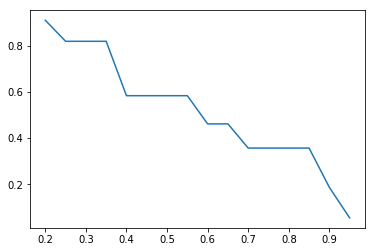

In [39]:
precicions[0]
plt.plot(np.arange(0.2, 1.0, 0.05),precicions[0])

In [33]:
sum(precicions)/len(precicions)

TypeError: unsupported operand type(s) for +: 'int' and 'list'